## 3.1 Problem 1 - Data Read, Write and Inspect

In [7]:
import os
print("Current Working Directory:", os.getcwd())
print(os.listdir())

Current Working Directory: C:\Users\USER\OneDrive - University of Wolverhampton\L5S1CG1\Concepts and Technologies of AI\5CS037-024\Workshop
['.ipynb_checkpoints', 'bank .csv', 'medical_students_dataset.csv', 'Titanic-Dataset.csv', 'worksheet-0.ipynb', 'worksheet-02.ipynb', 'worksheet-1.ipynb']


In [16]:
import pandas as pd

#1. loading the data using simple basic methods like head(), info()
df = pd.read_csv("bank.csv")

print(df.head())
print("\n")

print(df.info())
print("\n")

#2 checking the info of the dataFrame
#a columns with object as a datatype
object_columns = df.select_dtypes(include=['object']).columns
print("Columns with dtype=object:\n", object_columns.tolist())
print("\n")

#b unique values of those columns
for column in object_columns:
    print(f"Unique values in column '{column}':")
    print(df[column].unique())
    print("\n")

#c checking for null values in each column
null_counts = df.isnull().sum()
print("Null values in each columns: ")
print (null_counts)
print("\n")

df_numeric = df.drop(columns=object_columns)
print("DataFrame after dropping object dtype columns: ")
print(df_numeric.head())
print("\n")

df_numeric.to_csv("banknumericdata.csv", index=False)
print(f"Numeric datafram saved to banknumericdata.csv")

df_numeric = pd.read_csv("banknumericdata.csv")

print(df_numeric.head())
print("\n")

print("Summary Statistics")
print(df_numeric.describe())

   age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome   y  
0  unknown    5   may       261         1     -1         0  unknown  no  
1  unknown    5   may       151         1     -1         0  unknown  no  
2  unknown    5   may        76         1     -1         0  unknown  no  
3  unknown    5   may        92         1     -1         0  unknown  no  
4  unknown    5   may       198         1     -1         0  unknown  no  


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):


## Problem 2-Data Imputations 

In [4]:
import pandas as pd
df_medical = pd.read_csv("medical_students_dataset.csv")

print(df_medical.head())
print("\n")

print("some basic info about the dataset: ")
print(df_medical.info())

nullVal = df_medical.isnull().sum()
print("columns with missing values:")
print(nullVal[nullVal > 0])


num_cols = df_medical.select_dtypes(include=['float64']).columns


df_medical_mean = df_medical.copy()
df_medical_mean[num_cols] = df_medical_mean[num_cols].fillna(df_medical[num_cols].mean())


df_medical_median = df_medical.copy()
df_medical_median[num_cols] = df_medical_median[num_cols].fillna(df_medical[num_cols].median())


df_medical_ffill = df_medical.copy()
df_medical_ffill[num_cols] = df_medical_ffill[num_cols].ffill()


cat_cols = df_medical.select_dtypes(include=['object']).columns

df_medical_mode = df_medical.copy()
for col in cat_cols:
    df_medical_mode[col] = df_medical_mode[col].fillna(df_medical[col].mode()[0])


df_medical_ffill_cat = df_medical.copy()
df_medical_ffill_cat[cat_cols] = df_medical_ffill_cat[cat_cols].ffill()


df_medical['Student ID'] = df_medical['Student ID'].fillna(-1)

print("\nNumerical column statistics:")
for col in num_cols:
    print(f"Column: {col}")
    print(f"  Mean: {df_medical[col].mean()}")
    print(f"  Median: {df_medical[col].median()}")
    print(f"  Mode: {df_medical[col].mode()[0]}")
    print("\n")

print("Original DataFrame with missing values:\n")
print(df_medical.isnull().sum())

print("\nDataFrame with numerical columns filled with mean:\n")
print(df_medical_mean.isnull().sum())

print("\nDataFrame with numerical columns filled with median:\n")
print(df_medical_median.isnull().sum())

print("\nDataFrame with categorical columns filled with mode:\n")
print(df_medical_mode.isnull().sum())

duplicate_count = df_medical.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}\n")

if duplicate_count > 0:
   
    print("Duplicate rows:")
    print(df_medical[df_medical.duplicated(keep=False)])
    print("\n")

    df_medical_cleaned = df_medical.drop_duplicates()
    print(f"Shape of dataset after removing duplicates: {df_medical_cleaned.shape}")
else:
    print("No duplicate rows found in the dataset.")


print(df_medical.head(30))

   Student ID   Age  Gender      Height     Weight Blood Type        BMI  \
0         1.0  18.0  Female  161.777924  72.354947          O  27.645835   
1         2.0   NaN    Male  152.069157  47.630941          B        NaN   
2         3.0  32.0  Female  182.537664  55.741083          A  16.729017   
3         NaN  30.0    Male  182.112867  63.332207          B  19.096042   
4         5.0  23.0  Female         NaN  46.234173          O        NaN   

   Temperature  Heart Rate  Blood Pressure  Cholesterol Diabetes Smoking  
0          NaN        95.0           109.0        203.0       No     NaN  
1    98.714977        93.0           104.0        163.0       No      No  
2    98.260293        76.0           130.0        216.0      Yes      No  
3    98.839605        99.0           112.0        141.0       No     Yes  
4    98.480008        95.0             NaN        231.0       No      No  


some basic info about the dataset: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000

fillna () method is used to fill the NAN value with mean parameter because we are working with numerical data where the data is symmetrically distributed. similarly with median because it is less sensitive to outliers. fillna(-1) is used to replace all nan values of numerical columns. It does not make sense to use it in the categorical data. 
The inplace=True method would modify the original dataframe which makes it hard to retain the previous data. 


# Working with Titanic Dataset


## 3.2 Problem 1
Create a DataFrame that is subsetted for the columns ’Name’, ’Pclass’, ’Sex’, ’Age’, ’Fare’, and ’Survived’.
Retain only those rows where ’Pclass’ is equal to 1, representing first-class passengers. What is the mean,
median, maximum value, and minimum value of the ’Fare’ column? 


In [9]:
import pandas as pd

df_titanic = pd.read_csv("Titanic-dataset.csv")
subset_df = df_titanic.loc[df_titanic['Pclass'] == 1, ['Name', 'Pclass', 'Sex', 'Age', 'Fare', 'Survived']]

print("Subset DataFrame")
print(subset_df.head(20))
print("\n")

#min max mean median
print(f"Mean of Fare: {subset_df['Fare'].mean():0.2f}")
print(f"Median of Fare: {subset_df['Fare'].median():0.2f}")
print(f"Maximum of Fare: {subset_df['Fare'].max()}")
print(f"Minimum of Fare: {subset_df['Fare'].min()}")

Subset DataFrame
                                                 Name  Pclass     Sex   Age  \
1   Cumings, Mrs. John Bradley (Florence Briggs Th...       1  female  38.0   
3        Futrelle, Mrs. Jacques Heath (Lily May Peel)       1  female  35.0   
6                             McCarthy, Mr. Timothy J       1    male  54.0   
11                           Bonnell, Miss. Elizabeth       1  female  58.0   
23                       Sloper, Mr. William Thompson       1    male  28.0   
27                     Fortune, Mr. Charles Alexander       1    male  19.0   
30                           Uruchurtu, Don. Manuel E       1    male  40.0   
31     Spencer, Mrs. William Augustus (Marie Eugenie)       1  female   NaN   
34                            Meyer, Mr. Edgar Joseph       1    male  28.0   
35                     Holverson, Mr. Alexander Oskar       1    male  42.0   
52           Harper, Mrs. Henry Sleeper (Myna Haxtun)       1  female  49.0   
54                     Ostby, Mr. E

i have used .loc which is label-based selection and it selects specific rows and columns.
if we did not have any condition like displaying only the information of first-class passengers then, we could also do: 
subset_df = df.loc[:4, ['Name', 'Pclass', 'Sex', 'Age', 'Fare', 'Survived']]
print(subset_df)
[:4] this selects the first 5 rows 

.iloc could have been used but it requires integer indices and also does not support direct condition-based row filtering. 

## Problem 2
How many null values are contained in the ’Age’ column in your subsetted DataFrame? Once you’ve found
this out, drop them from your DataFrame.

In [11]:
subset_df = subset_df.head(20)
print(f"Number of null values in the 'Age' column: {subset_df['Age'].isnull().sum()}")
print("Rows where 'Age' is null: ", subset_df[subset_df['Age'].isnull()])

Number of null values in the 'Age' column: 3
Rows where 'Age' is null:                                                Name  Pclass     Sex  Age  \
31  Spencer, Mrs. William Augustus (Marie Eugenie)       1  female  NaN   
55                               Woolner, Mr. Hugh       1    male  NaN   
64                           Stewart, Mr. Albert A       1    male  NaN   

        Fare  Survived  
31  146.5208         1  
55   35.5000         1  
64   27.7208         0  


In [19]:
subset_df = subset_df.drop(subset_df[subset_df['Age'].isnull()].index)
print(subset_df)
print("\n")
print("Total no of rows after dropping null values", len(subset_df))
print("Number of null values on 'age' column: ", subset_df['Age'].isnull().sum())


                                                 Name  Pclass     Sex   Age  \
1   Cumings, Mrs. John Bradley (Florence Briggs Th...       1  female  38.0   
3        Futrelle, Mrs. Jacques Heath (Lily May Peel)       1  female  35.0   
6                             McCarthy, Mr. Timothy J       1    male  54.0   
11                           Bonnell, Miss. Elizabeth       1  female  58.0   
23                       Sloper, Mr. William Thompson       1    male  28.0   
27                     Fortune, Mr. Charles Alexander       1    male  19.0   
30                           Uruchurtu, Don. Manuel E       1    male  40.0   
34                            Meyer, Mr. Edgar Joseph       1    male  28.0   
35                     Holverson, Mr. Alexander Oskar       1    male  42.0   
52           Harper, Mrs. Henry Sleeper (Myna Haxtun)       1  female  49.0   
54                     Ostby, Mr. Engelhart Cornelius       1    male  65.0   
61                                Icard, Miss. Ameli

## Problem-3 
The ’Embarked’ column in the Titanic dataset contains categorical data representing the ports of embarkation:
•’C’ for Cherbourg
•’Q’ for Queenstown
•’S’ for Southampton

Task:
1. Use one-hot encoding to convert the ’Embarked’ column into separate binary columns (’Embarked C’,
’Embarked Q’, ’Embarked S’).
2. Add these new columns to the original DataFrame.
3. Drop the original ’Embarked’ column.
4. Print the first few rows of the modified DataFrame to verify the changes.

In [21]:
import pandas as pd
df_titanic = pd.read_csv("Titanic-dataset.csv")
embarked_onehot = pd.get_dummies(df_titanic['Embarked'], prefix="Embarked")
df_encoded = pd.concat([df_titanic, embarked_onehot], axis=1)

print(df_encoded[['Embarked', 'Embarked_C', 'Embarked_Q', 'Embarked_S']].head(20))

   Embarked  Embarked_C  Embarked_Q  Embarked_S
0         S       False       False        True
1         C        True       False       False
2         S       False       False        True
3         S       False       False        True
4         S       False       False        True
5         Q       False        True       False
6         S       False       False        True
7         S       False       False        True
8         S       False       False        True
9         C        True       False       False
10        S       False       False        True
11        S       False       False        True
12        S       False       False        True
13        S       False       False        True
14        S       False       False        True
15        S       False       False        True
16        Q       False        True       False
17        S       False       False        True
18        S       False       False        True
19        C        True       False     

In [25]:
import pandas as pd

df_titanic = pd.read_csv("Titanic-dataset.csv")
embarked_onehot = pd.get_dummies(df_titanic['Embarked'], prefix="Embarked")

df_encoded = pd.concat([df_titanic, embarked_onehot], axis=1)

# Converting boolean columns to integers (1s and 0s)
df_encoded['Embarked_C'] = df_encoded['Embarked_C'].astype(int)
df_encoded['Embarked_Q'] = df_encoded['Embarked_Q'].astype(int)
df_encoded['Embarked_S'] = df_encoded['Embarked_S'].astype(int)

print(df_encoded[['Embarked', 'Embarked_C', 'Embarked_Q', 'Embarked_S']].head(20))

print("null in embarked: ", df_titanic['Embarked'].isnull().sum())


   Embarked  Embarked_C  Embarked_Q  Embarked_S
0         S           0           0           1
1         C           1           0           0
2         S           0           0           1
3         S           0           0           1
4         S           0           0           1
5         Q           0           1           0
6         S           0           0           1
7         S           0           0           1
8         S           0           0           1
9         C           1           0           0
10        S           0           0           1
11        S           0           0           1
12        S           0           0           1
13        S           0           0           1
14        S           0           0           1
15        S           0           0           1
16        Q           0           1           0
17        S           0           0           1
18        S           0           0           1
19        C           1           0     

In [43]:
import pandas as pd
#4
df_titanic = pd.read_csv("titanic-dataset.csv")

subset_df = df_titanic.loc[df_titanic['Pclass'] == 1, ['Name', 'Pclass', 'Sex', 'Age', 'Fare', 'Survived', 'Embarked']]

subset_df = subset_df.drop(subset_df[subset_df['Age'].isnull()].index)

embarked_onehot = pd.get_dummies(subset_df['Embarked'], prefix='Embarked')

df_encoded = pd.concat([subset_df, embarked_onehot], axis=1)

df_encoded = df_encoded.drop('Embarked', axis=1)

df_encoded['Embarked_C'] = df_encoded['Embarked_C'].astype(int)
df_encoded['Embarked_Q'] = df_encoded['Embarked_Q'].astype(int)
df_encoded['Embarked_S'] = df_encoded['Embarked_S'].astype(int)
print(df_encoded.head())


                                                 Name  Pclass     Sex   Age  \
1   Cumings, Mrs. John Bradley (Florence Briggs Th...       1  female  38.0   
3        Futrelle, Mrs. Jacques Heath (Lily May Peel)       1  female  35.0   
6                             McCarthy, Mr. Timothy J       1    male  54.0   
11                           Bonnell, Miss. Elizabeth       1  female  58.0   
23                       Sloper, Mr. William Thompson       1    male  28.0   

       Fare  Survived  Embarked_C  Embarked_Q  Embarked_S  
1   71.2833         1           1           0           0  
3   53.1000         1           0           0           1  
6   51.8625         0           0           0           1  
11  26.5500         1           0           0           1  
23  35.5000         1           0           0           1  


## Problem-4
Compare the mean survival rates (’Survived’) for the different groups in the ’Sex’ column. Draw a visual-
ization to show how the survival distributions vary by gender.

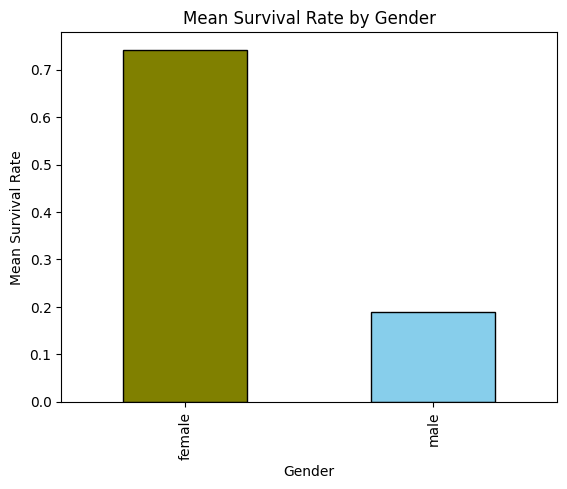

In [51]:
import pandas as pd
import matplotlib.pyplot as plt

df_titanic = pd.read_csv("titanic-dataset.csv")

mean_survival_by_gender = df_titanic.groupby('Sex')['Survived'].mean()

mean_survival_by_gender.plot(kind='bar', color=['olive', 'skyblue'], edgecolor="black")
plt.title('Mean Survival Rate by Gender')
plt.xlabel('Gender')
plt.ylabel('Mean Survival Rate')
plt.show()


it shows that a significantly higher proportion of females survived compared to males. the mean survival rate for females is above 70% and for males, below 20% which is considerably lower. 

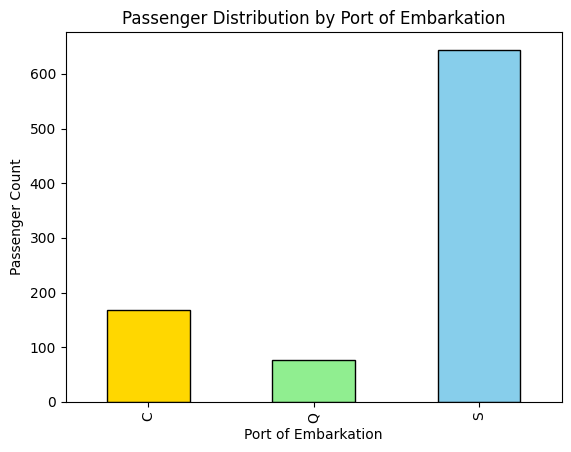

In [50]:
import pandas as pd
import matplotlib.pyplot as plt

df_titanic = pd.read_csv("Titanic-dataset.csv")

df_titanic['Embarked'] = df_titanic['Embarked'].fillna('Unknown')

passenger_count_by_embarked = df_titanic['Embarked'].value_counts()

passenger_count_by_embarked = passenger_count_by_embarked.loc[['C', 'Q', 'S']]

# Plotting
passenger_count_by_embarked.plot(kind='bar', color=['gold', 'lightgreen', 'skyblue'], edgecolor='black')
plt.title('Passenger Distribution by Port of Embarkation')
plt.xlabel('Port of Embarkation')
plt.ylabel('Passenger Count')
plt.show()